In [3]:
import pandas as pd
import sweetviz as sv
import os

from tqdm import tqdm
from IPython.display import display

print("Librerías importadas correctamente.")

d:\ADPrograma\anaconda3\envs\xgb_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\ADPrograma\anaconda3\envs\xgb_env\Lib\site-packages\sweetviz\graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


Librerías importadas correctamente.


In [5]:
# Definir la ruta al archivo de datos crudos
# Usamos 'os.path.join' para construir la ruta de forma segura
# '../' sube un nivel desde la carpeta 'notebooks' a la raíz del proyecto
ruta_datos_crudos = os.path.join('..', 'data', '01_raw', 'LLCP2022.XPT')

# Cargar el dataset usando pandas (que internamente usará pyreadstat)
try:
    df_raw = pd.read_sas(ruta_datos_crudos, format='xport')
    print(f"Dataset cargado exitosamente. Dimensiones: {df_raw.shape}")
    print("Primeras 5 filas del dataset:")
    display(df_raw.head())
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta '{ruta_datos_crudos}'.")
    print("Asegúrate de haber descargado y colocado el archivo LLCP2022.XPT en la carpeta 'data/01_raw/'.")

Dataset cargado exitosamente. Dimensiones: (445132, 328)
Primeras 5 filas del dataset:


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000001',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,1.0,1.0,b'02042022',b'02',b'04',b'2022',1100.0,b'2022000002',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0
2,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000003',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0
3,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000004',2.022000e+09,1.0,...,3.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,9.0,9.0,2.0
4,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000005',2.022000e+09,1.0,...,4.0,NaN,1.0,1.000000e+01,1.0,1.400000e+02,1.0,NaN,NaN,2.0


Creando un subconjunto enriquecido del DataFrame para el EDA...
Tamaño original del subconjunto: (445132, 21)
Tamaño después de limpiar valores faltantes en el target: (442067, 21)
Mapeando la variable objetivo a formato binario (1 para 'Sí', 0 para 'No')...
Mapeo completado.
Generando reporte con Sweetviz...


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



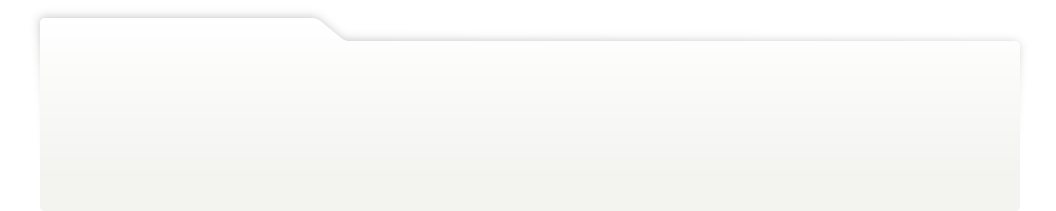
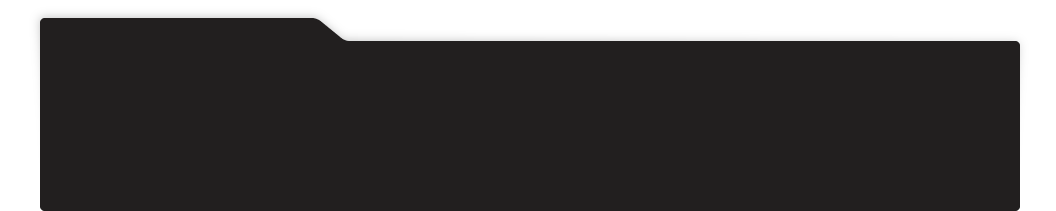
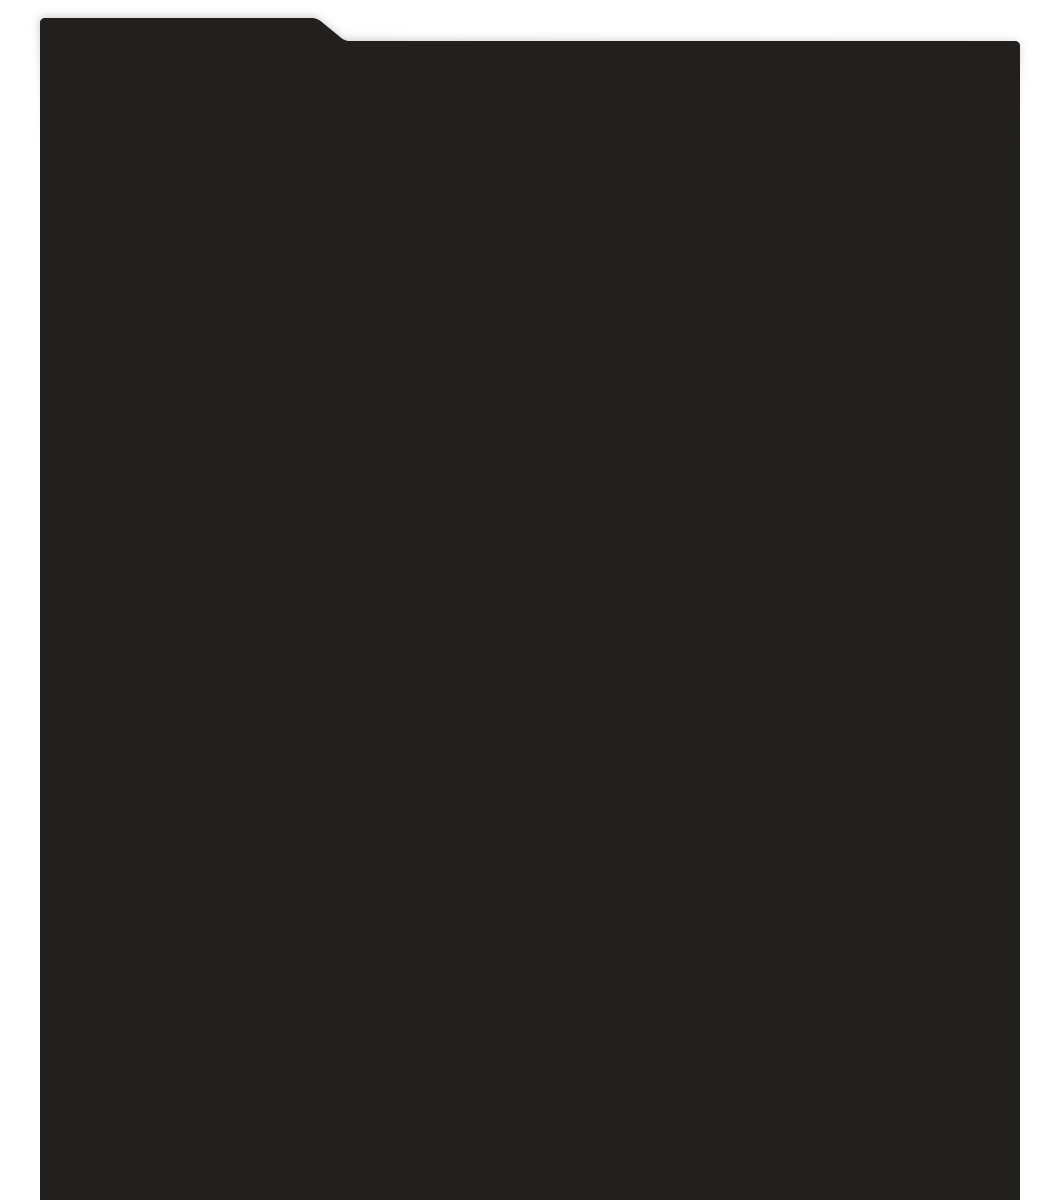
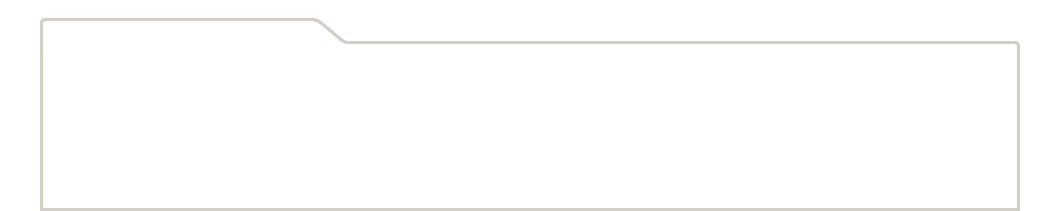
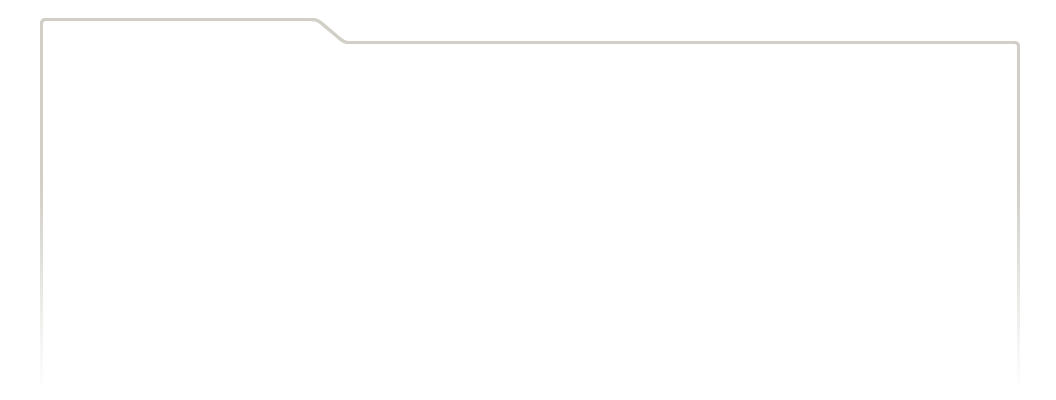
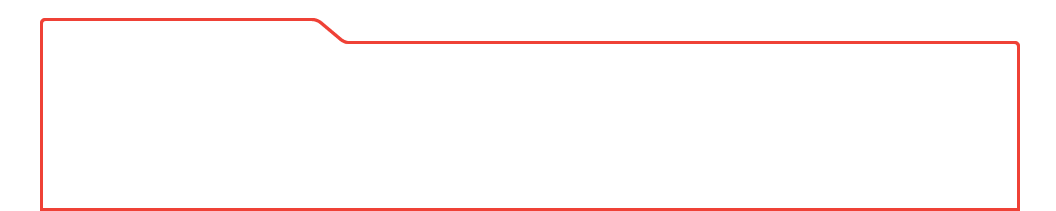
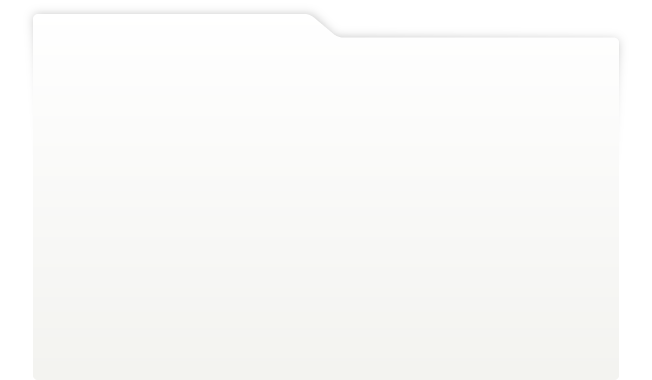
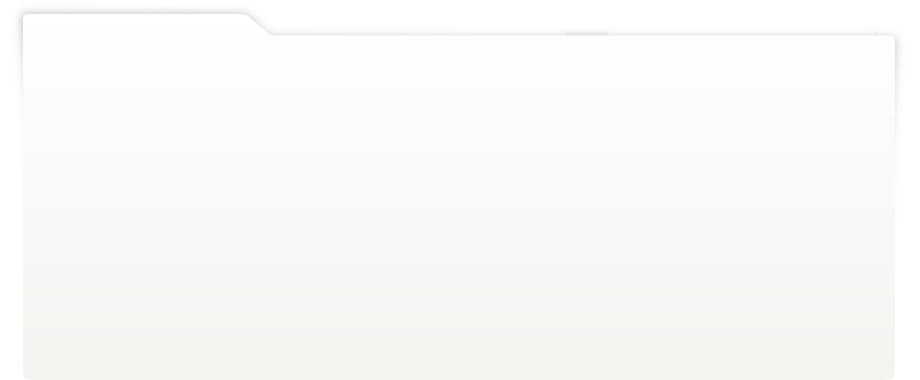
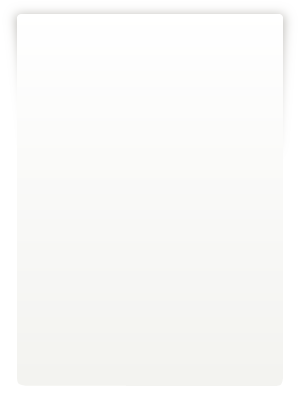
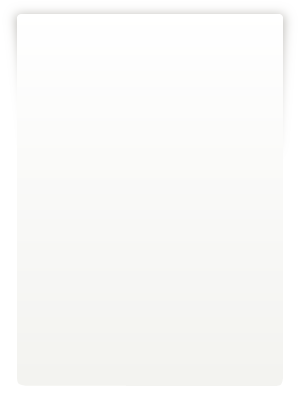
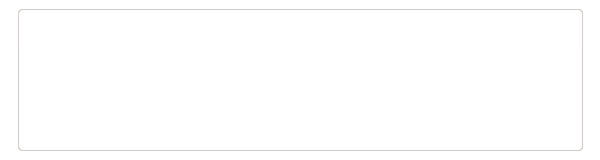
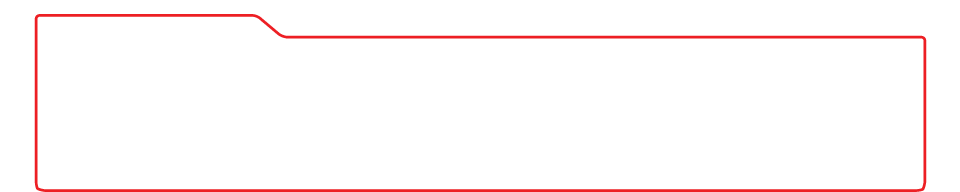
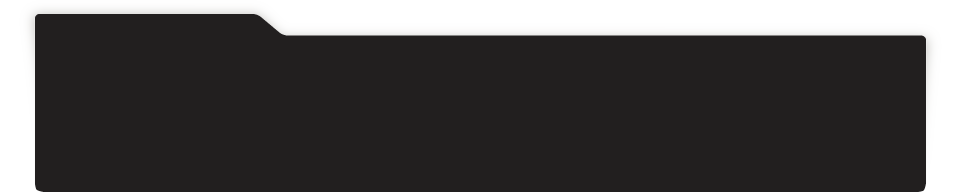
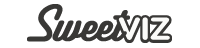
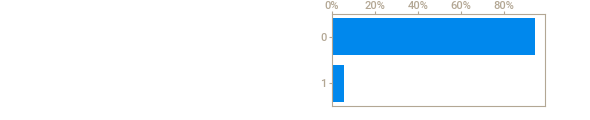
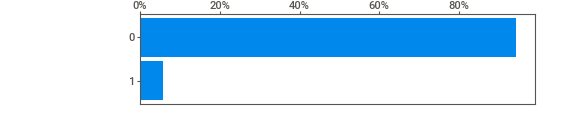
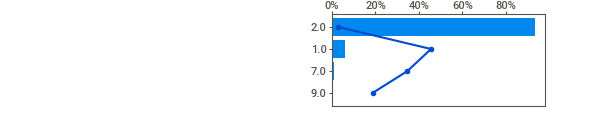
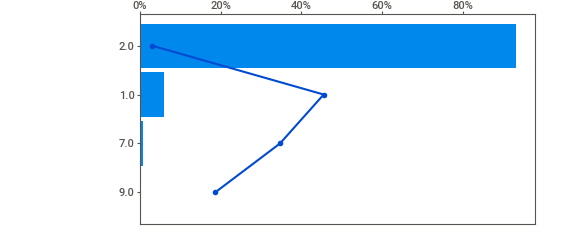
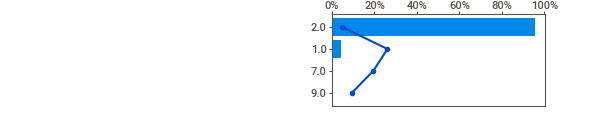
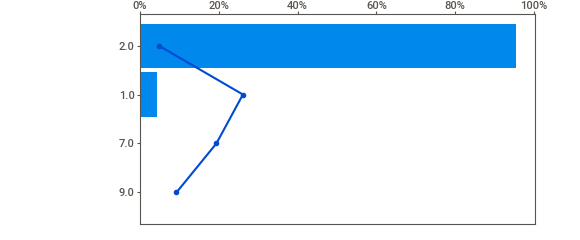
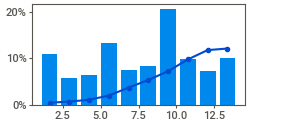
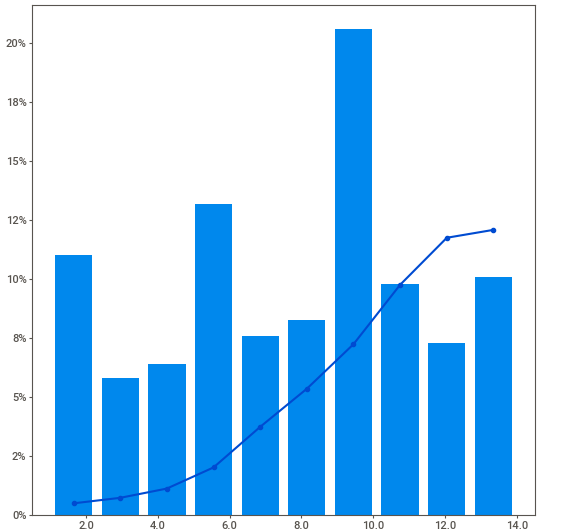
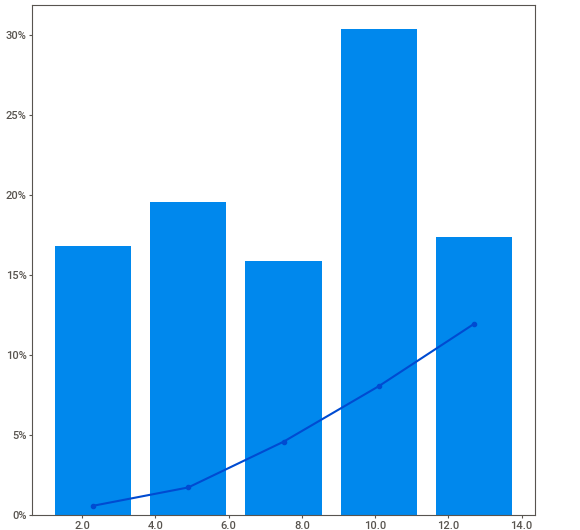
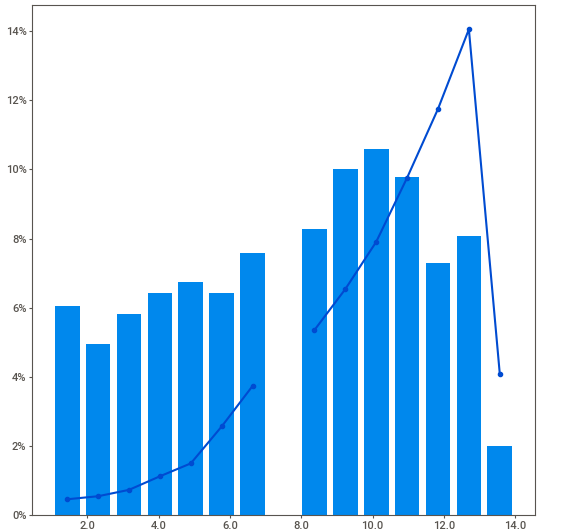
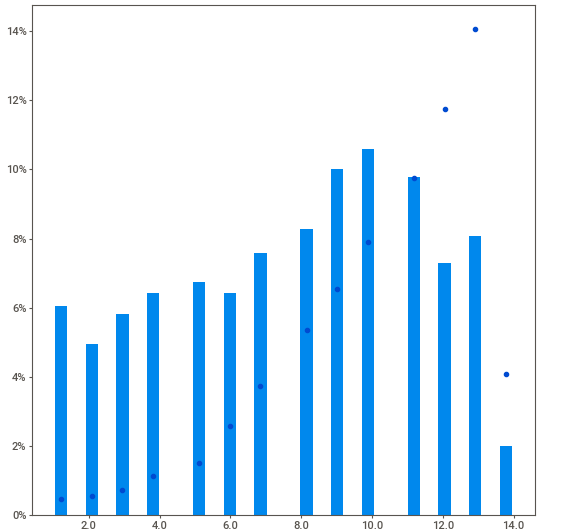
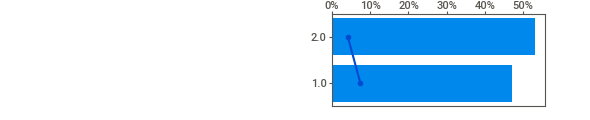
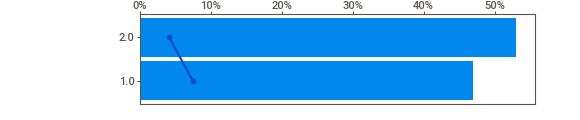
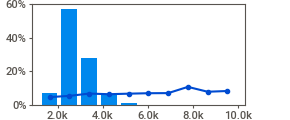
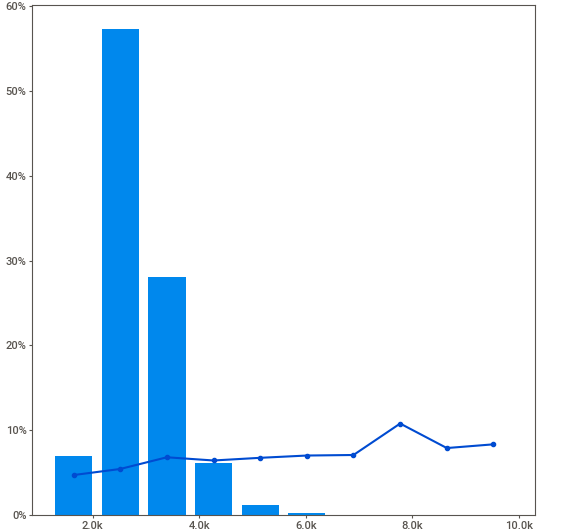
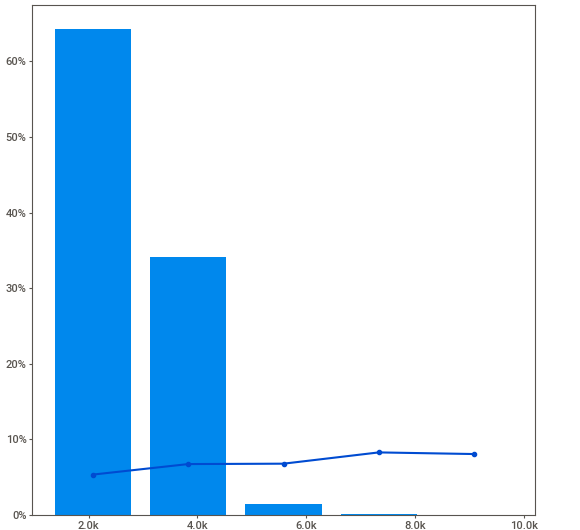
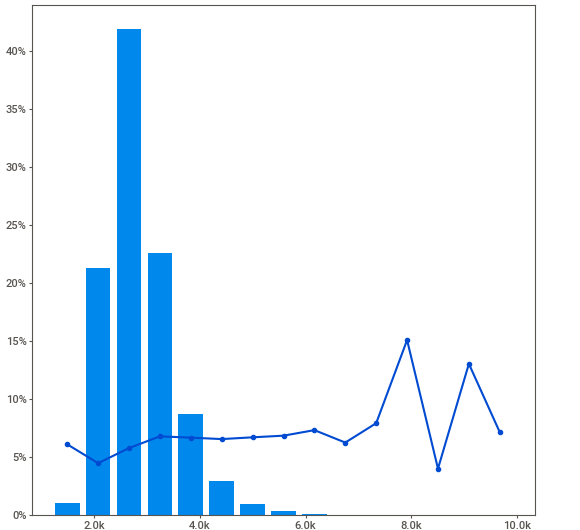
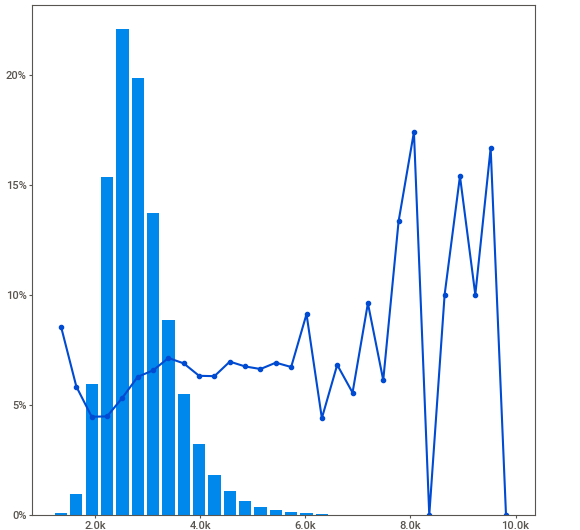
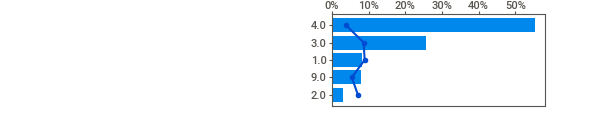
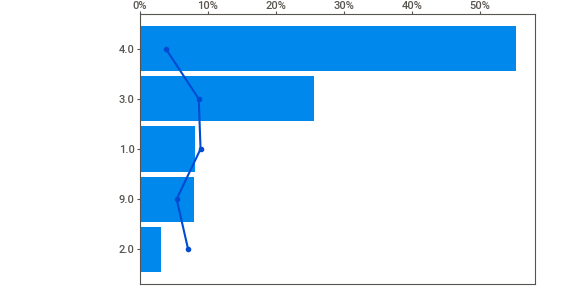
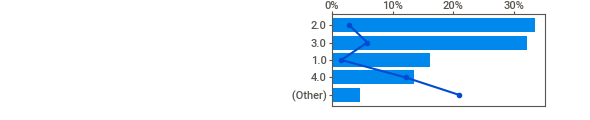
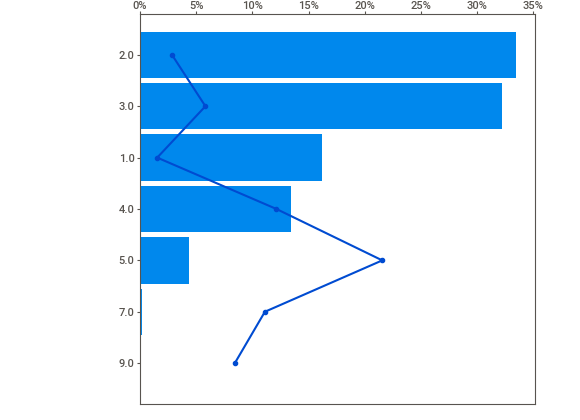
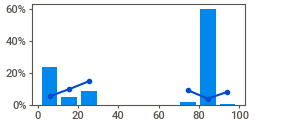
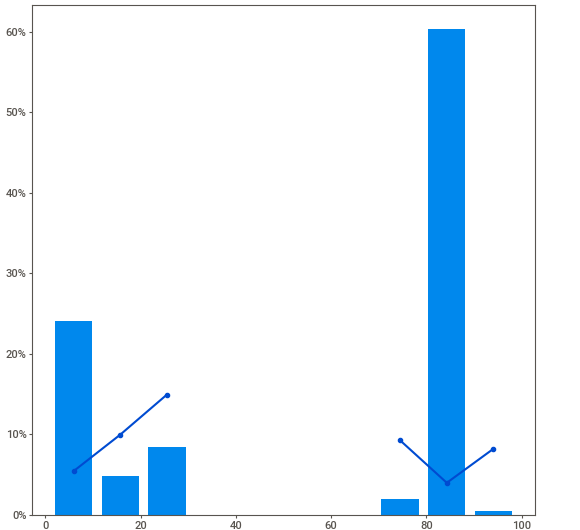
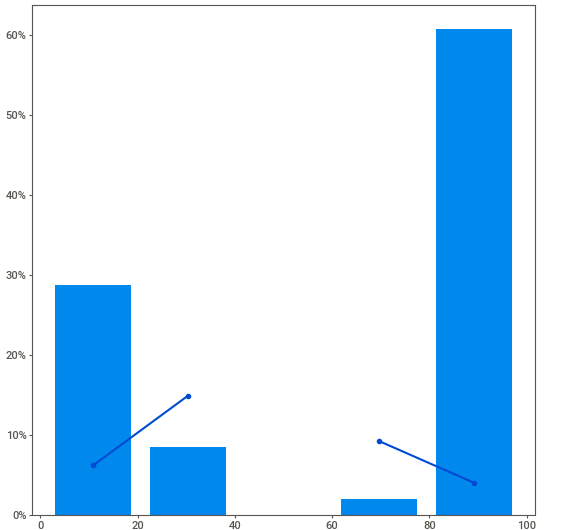
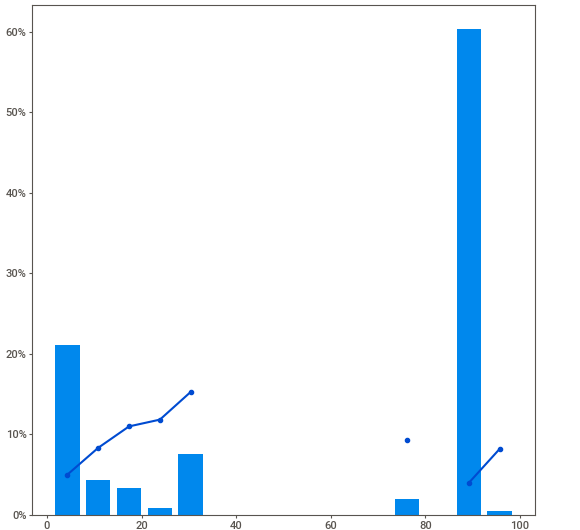
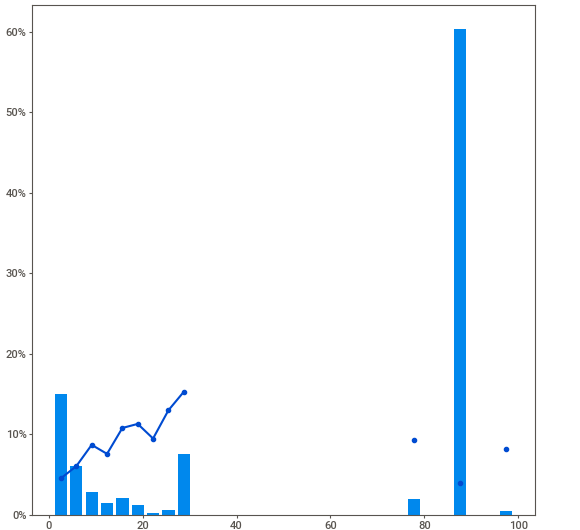
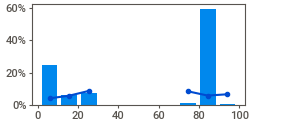
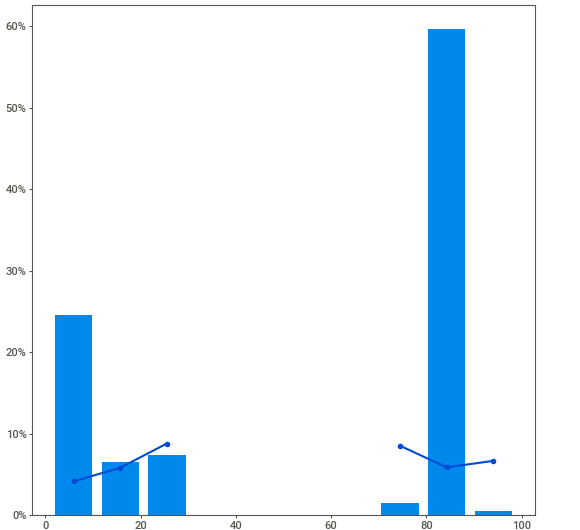
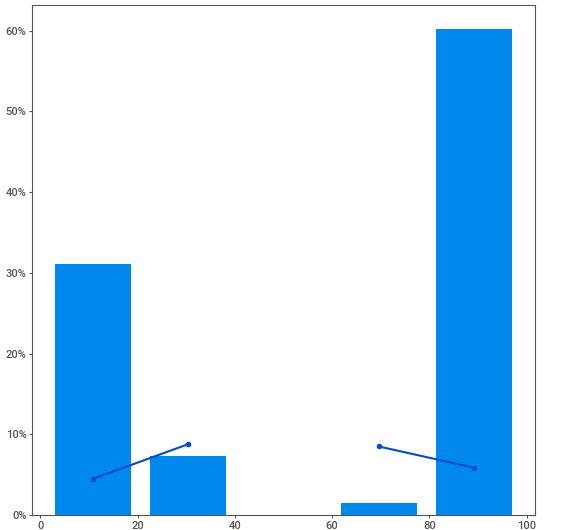
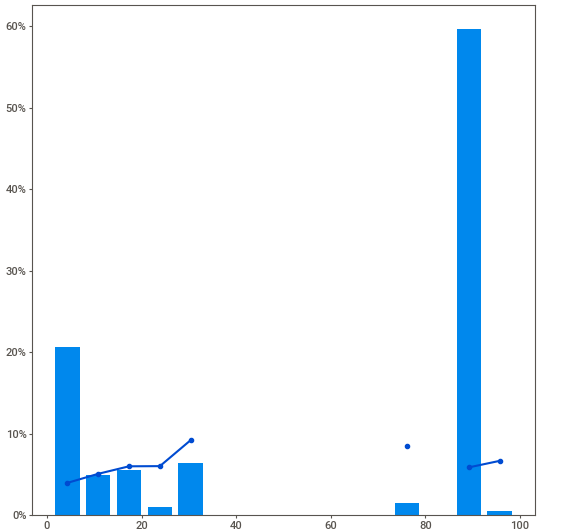
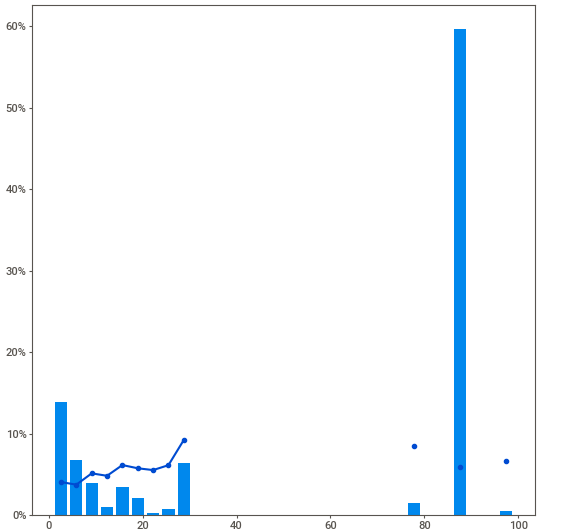
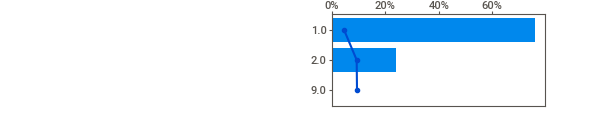
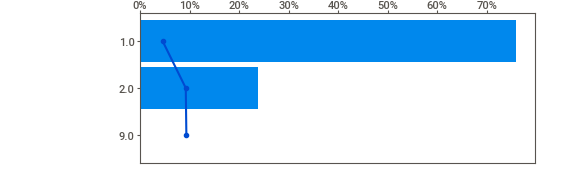
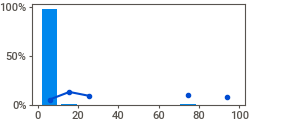
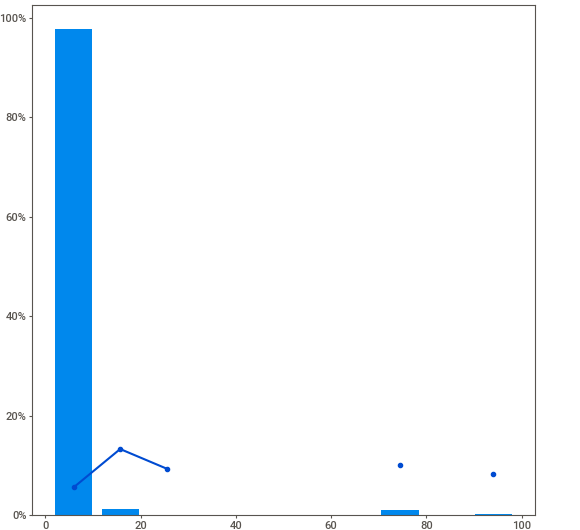
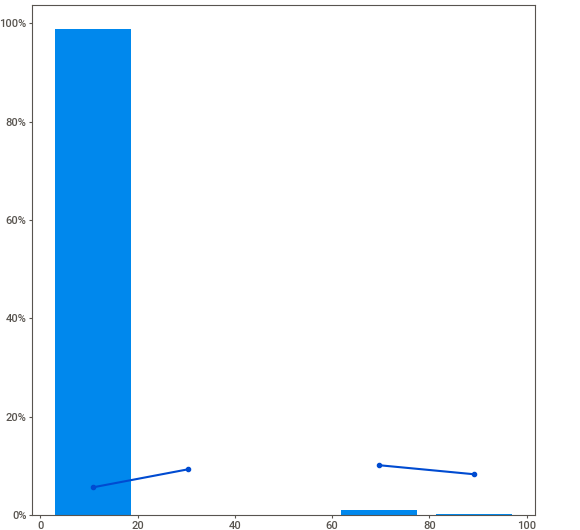
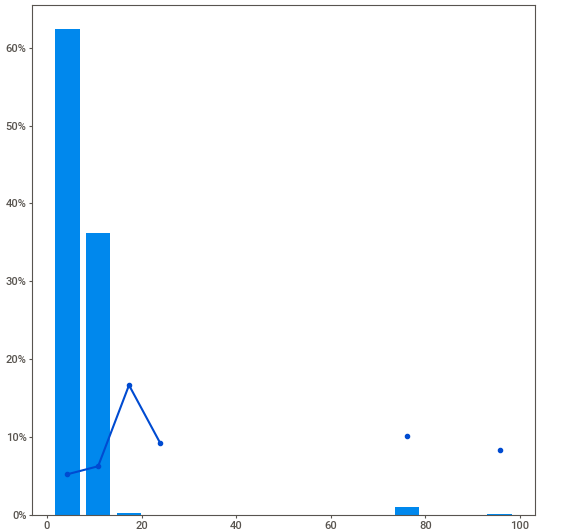
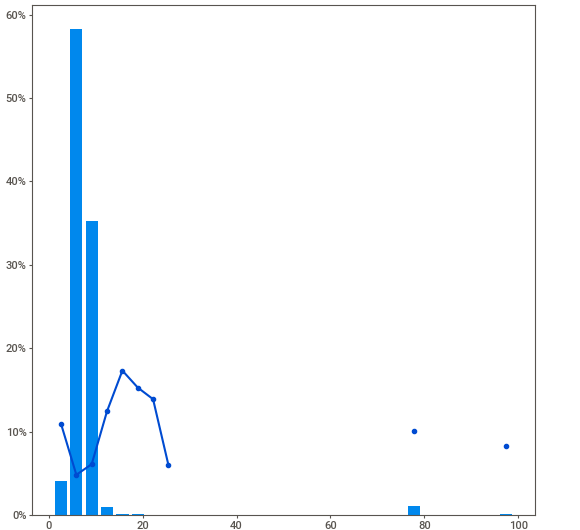
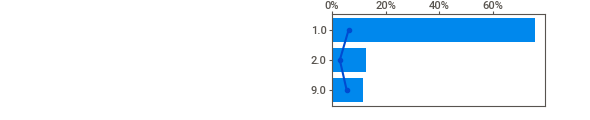
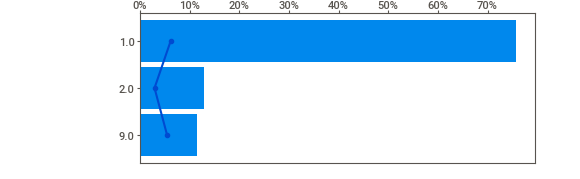
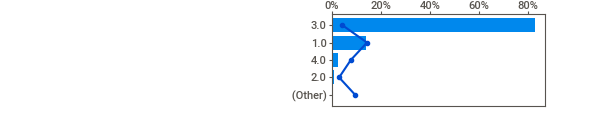
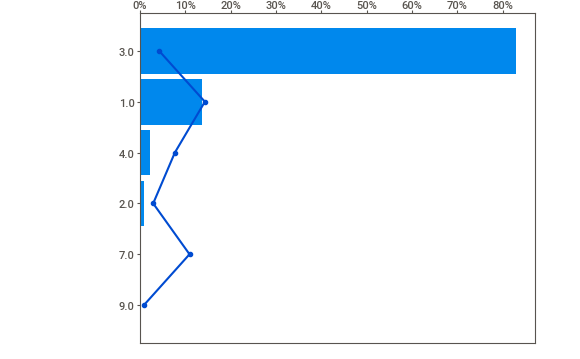
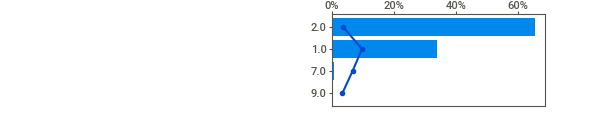
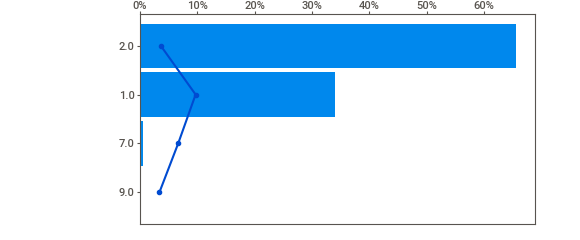
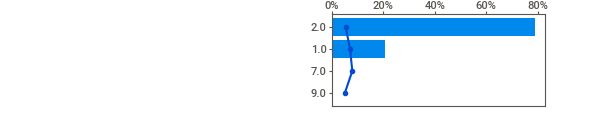
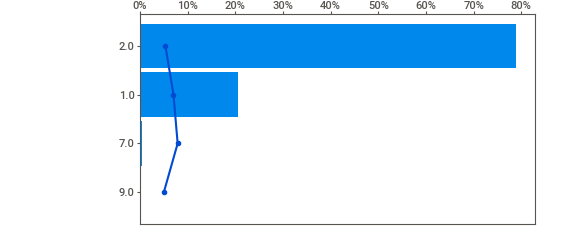
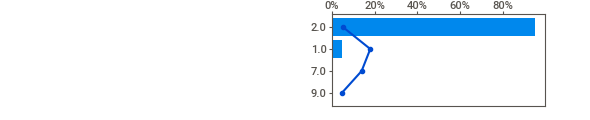
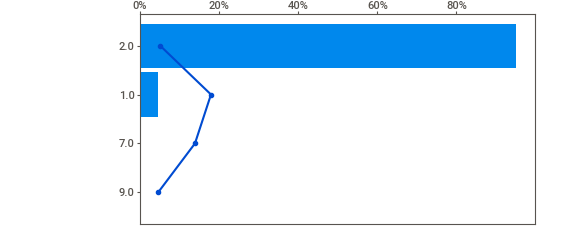
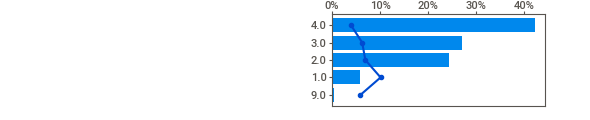
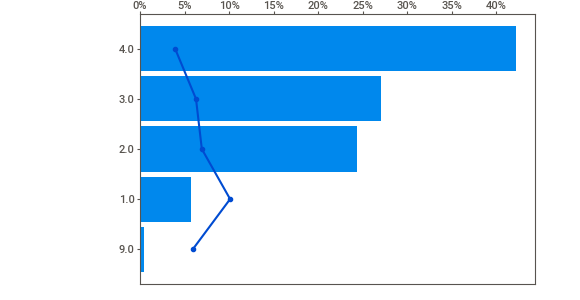
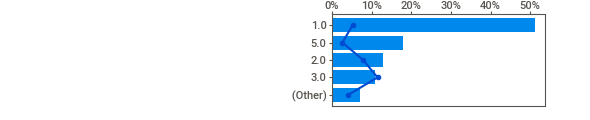
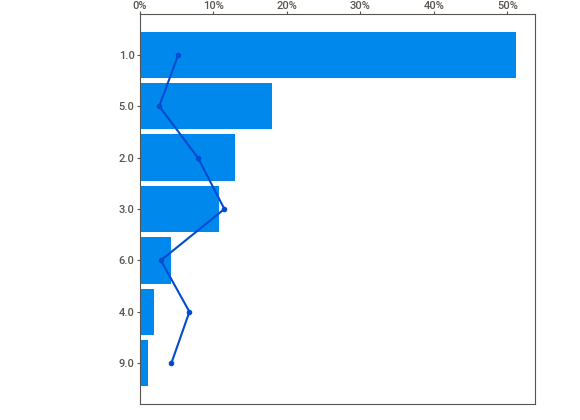
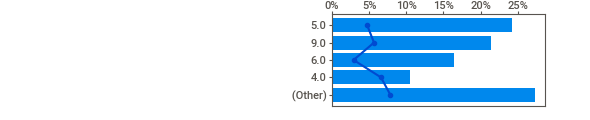
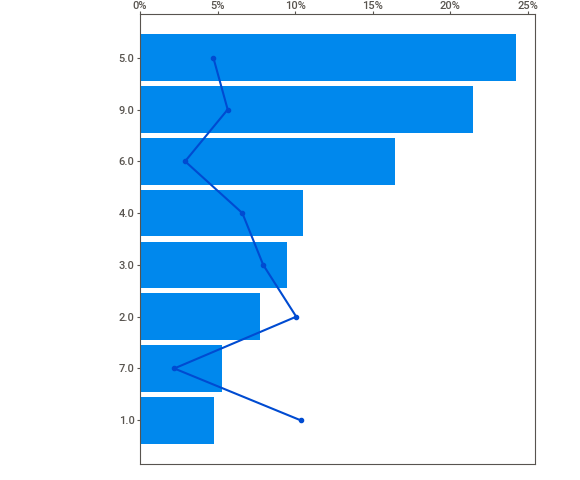
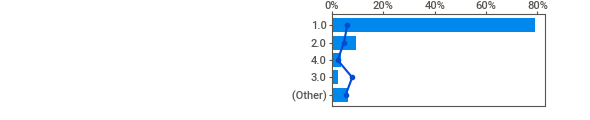
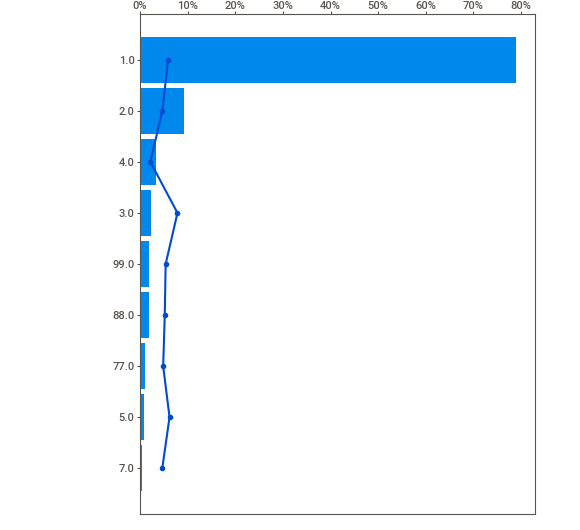
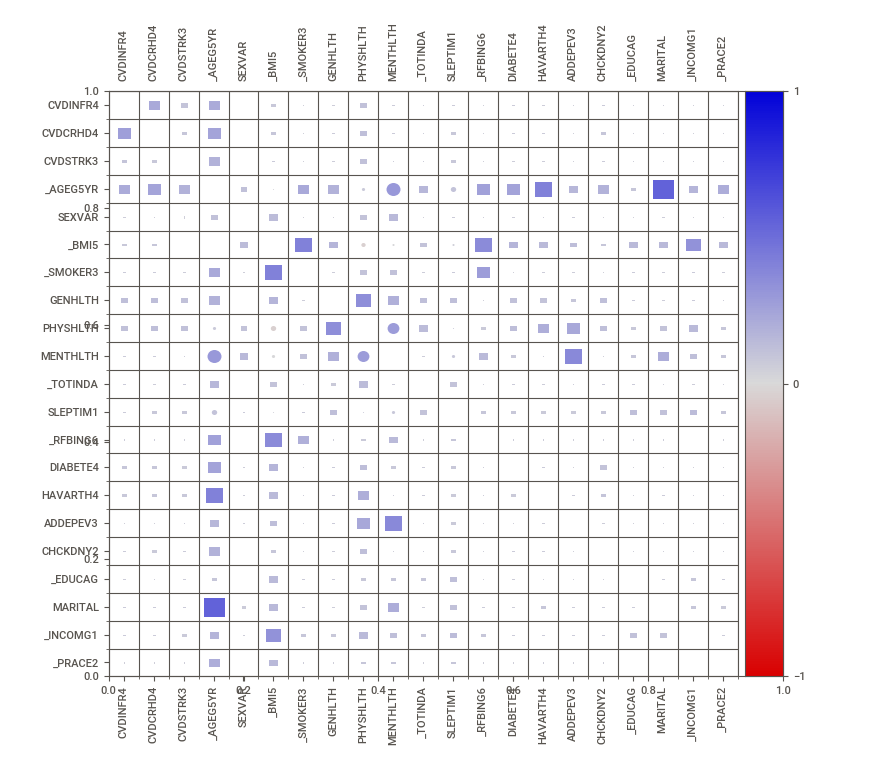
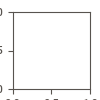

✅ Reporte enriquecido generado exitosamente.


In [6]:
# --- CELDA PARA ANÁLISIS EXPLORATORIO (VERSIÓN FINAL) ---

import pandas as pd
import sweetviz as sv
import os

# (Asumimos que df_raw ya está cargado de la celda anterior)

# 1. Define la lista de columnas ampliada y validada.
columnas_enriquecidas = [
    # --- Variables Target (Objetivo) ---
    'CVDINFR4',  # Ataque al corazón (Infarto de Miocardio)
    'CVDCRHD4',  # Angina o Enfermedad Coronaria
    'CVDSTRK3',  # ACV (Stroke)

    # --- Factores de Riesgo Principales ---
    '_AGEG5YR',  # Edad en categorías de 5 años
    'SEXVAR',    # Sexo
    '_BMI5',     # Índice de Masa Corporal (calculado)
    '_SMOKER3',  # Fumador (calculado)
    
    # --- Estilo de Vida y Salud General ---
    'GENHLTH',   # Salud General (percepción)
    'PHYSHLTH',  # Días con mala salud física
    'MENTHLTH',  # Días con mala salud mental
    '_TOTINDA',  # Actividad Física
    'SLEPTIM1',  # Horas de sueño
    '_RFBING6',  # Consumo excesivo de alcohol (Binge Drinking)

    # --- Comorbilidades Relevantes ---
    'DIABETE4',  # Diabetes
    'HAVARTH4',  # Artritis
    'ADDEPEV3',  # Depresión
    'CHCKDNY2',  # Enfermedad Renal Crónica
    
    # --- VARIABLES RECOMENDADAS (Determinantes Sociales) ---
    '_EDUCAG',   # Nivel Educativo
    'MARITAL',   # Estado Civil
    '_INCOMG1',  # Nivel de Ingresos
    '_PRACE2'    # Raza/Etnia
]

# 2. Crea el subconjunto del DataFrame.
print("Creando un subconjunto enriquecido del DataFrame para el EDA...")
df_analisis = df_raw[columnas_enriquecidas].copy()

# 3. Limpieza de la variable objetivo (Eliminar valores nulos).
print(f"Tamaño original del subconjunto: {df_analisis.shape}")
df_analisis = df_analisis[df_analisis['CVDINFR4'].isin([1.0, 2.0])]
print(f"Tamaño después de limpiar valores faltantes en el target: {df_analisis.shape}")

# 4. Transformación de la variable objetivo (Mapeo a 0 y 1) - NUEVO PASO
print("Mapeando la variable objetivo a formato binario (1 para 'Sí', 0 para 'No')...")
df_analisis['CVDINFR4'] = df_analisis['CVDINFR4'].map({1.0: 1, 2.0: 0})
print("Mapeo completado.")

# 5. Genera el reporte con el DataFrame limpio, transformado y enriquecido.
print("Generando reporte con Sweetviz...")
try:
    reporte_enriquecido = sv.analyze(df_analisis, target_feat='CVDINFR4')
    reporte_enriquecido.show_notebook()
    print("✅ Reporte enriquecido generado exitosamente.")
except Exception as e:
    print(f"❌ Fallo al generar el reporte: {e}")

In [7]:
# =============================================================================
# --- 6. GUARDAR DATAFRAME PROCESADO (NUEVO PASO FINAL) ---
# =============================================================================
# Objetivo: Guardar el DataFrame limpio para que otros notebooks puedan usarlo
# directamente sin repetir los pasos de limpieza.

print("Guardando el DataFrame procesado...")

# Crear la ruta al directorio de datos procesados
ruta_procesados = os.path.join('..', 'data', '02_processed')
# Asegurarse de que el directorio exista
os.makedirs(ruta_procesados, exist_ok=True)

# Guardar el DataFrame como un archivo CSV
ruta_archivo_limpio = os.path.join(ruta_procesados, 'brfss_2022_cleaned.csv')
df_analisis.to_csv(ruta_archivo_limpio, index=False)

print(f"✅ DataFrame guardado exitosamente en: '{ruta_archivo_limpio}'")

Guardando el DataFrame procesado...
✅ DataFrame guardado exitosamente en: '..\data\02_processed\brfss_2022_cleaned.csv'
